# Comparison: Soybean

https://archive.ics.uci.edu/ml/datasets/soybean+(small)

In [ ]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/EDQC/dqc')

Mounted at /content/drive/


## Initialization

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.visualization import animator


## Reading Data

In [ ]:
soybean = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-small.data', header=None)
label = 'Soybean'

In [ ]:
soybean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       47 non-null     int64 
 1   1       47 non-null     int64 
 2   2       47 non-null     int64 
 3   3       47 non-null     int64 
 4   4       47 non-null     int64 
 5   5       47 non-null     int64 
 6   6       47 non-null     int64 
 7   7       47 non-null     int64 
 8   8       47 non-null     int64 
 9   9       47 non-null     int64 
 10  10      47 non-null     int64 
 11  11      47 non-null     int64 
 12  12      47 non-null     int64 
 13  13      47 non-null     int64 
 14  14      47 non-null     int64 
 15  15      47 non-null     int64 
 16  16      47 non-null     int64 
 17  17      47 non-null     int64 
 18  18      47 non-null     int64 
 19  19      47 non-null     int64 
 20  20      47 non-null     int64 
 21  21      47 non-null     int64 
 22  22      47 non-null     int6

In [ ]:
classes = soybean[35]
soybean.drop(35, axis=1, inplace=True)

In [ ]:
classes.value_counts()

D4    17
D1    10
D2    10
D3    10
Name: 35, dtype: int64

In [ ]:
for col in soybean.columns:
  soybean[col] = soybean[col].apply(int)

In [ ]:
soybean.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,4,0,2,1,1,1,0,1,0,2,...,0,0,0,4,0,0,0,0,0,0
1,5,0,2,1,0,3,1,1,1,2,...,0,0,0,4,0,0,0,0,0,0
2,3,0,2,1,0,2,0,2,1,1,...,0,0,0,4,0,0,0,0,0,0
3,6,0,2,1,0,1,1,1,0,0,...,0,0,0,4,0,0,0,0,0,0
4,4,0,2,1,0,3,0,2,0,2,...,0,0,0,4,0,0,0,0,0,0


In [ ]:
description = soybean.describe().T
description

,count,mean,std,min,25%,50%,75%,max
0,47.0,2.702128,2.042110,0.0,1.0,3.0,4.0,6.0
1,47.0,0.531915,0.504375,0.0,0.0,1.0,1.0,1.0
2,47.0,1.489362,0.830724,0.0,1.0,2.0,2.0,2.0
3,47.0,0.765957,0.666358,0.0,0.0,1.0,1.0,2.0
4,47.0,0.319149,0.471186,0.0,0.0,0.0,1.0,1.0
5,47.0,1.723404,1.077479,0.0,1.0,2.0,3.0,3.0
6,47.0,1.212766,0.858111,0.0,1.0,1.0,1.0,3.0
7,47.0,1.404255,0.496053,1.0,1.0,1.0,2.0,2.0
8,47.0,0.489362,0.505291,0.0,0.0,0.0,1.0,1.0
9,47.0,1.127660,0.824015,0.0,0.0,1.0,2.0,2.0


In [ ]:
description[description['std'] == 0]

,count,mean,std,min,25%,50%,75%,max
10,47.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,47.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
14,47.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
15,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,47.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
28,47.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
29,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

In [ ]:
# Clean the features with constant value
l = description[description['std'] == 0].index.to_list()
soybean.drop(l, axis=1, inplace=True)

In [ ]:
len(l)

14

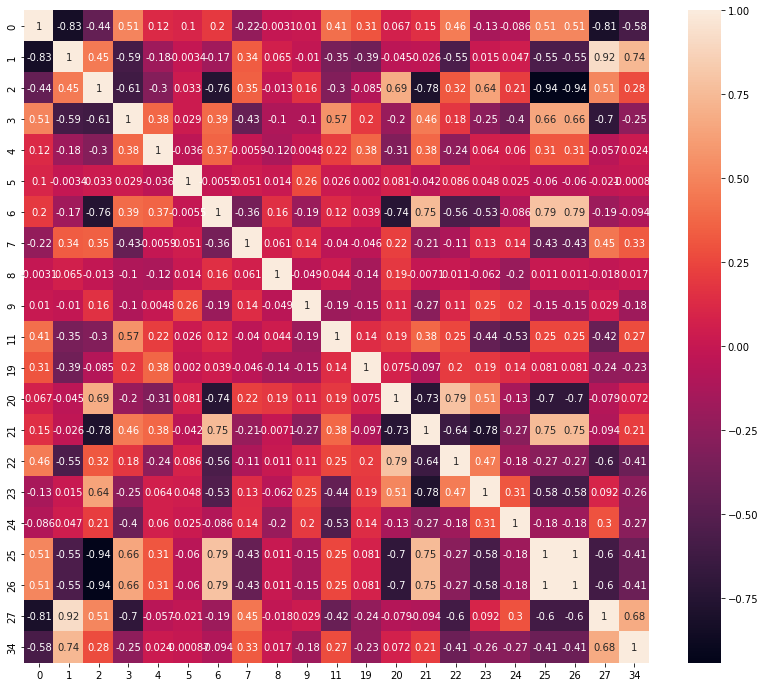

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(soybean.corr(), annot=True)

In [ ]:
soybean.shape

(47, 21)

In [ ]:
# Remove fully correlated feature: #26
soybean.drop([26], axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(soybean)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=17, random_state=0)
df = pd.DataFrame(pca.fit_transform(x_scaled))

In [ ]:
ddf = df.loc[:,6:12]

In [ ]:
ddf['class'] = classes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ddf.head()

,6,7,8,9,10,11,12,class
0,0.604145,0.691382,0.071053,-0.314788,-0.257680,-0.316710,-0.102330,D1
1,0.332599,-0.639215,0.430729,0.180234,0.010662,0.096629,0.078149,D1
2,-0.266005,0.277212,-0.400876,0.051747,0.251843,-0.228275,0.087789,D1
3,-0.423360,-0.229232,0.044525,0.032097,-0.167862,0.303664,-0.011814,D1
4,-0.056732,0.122307,-0.367094,0.103453,0.048570,-0.056797,0.059904,D1


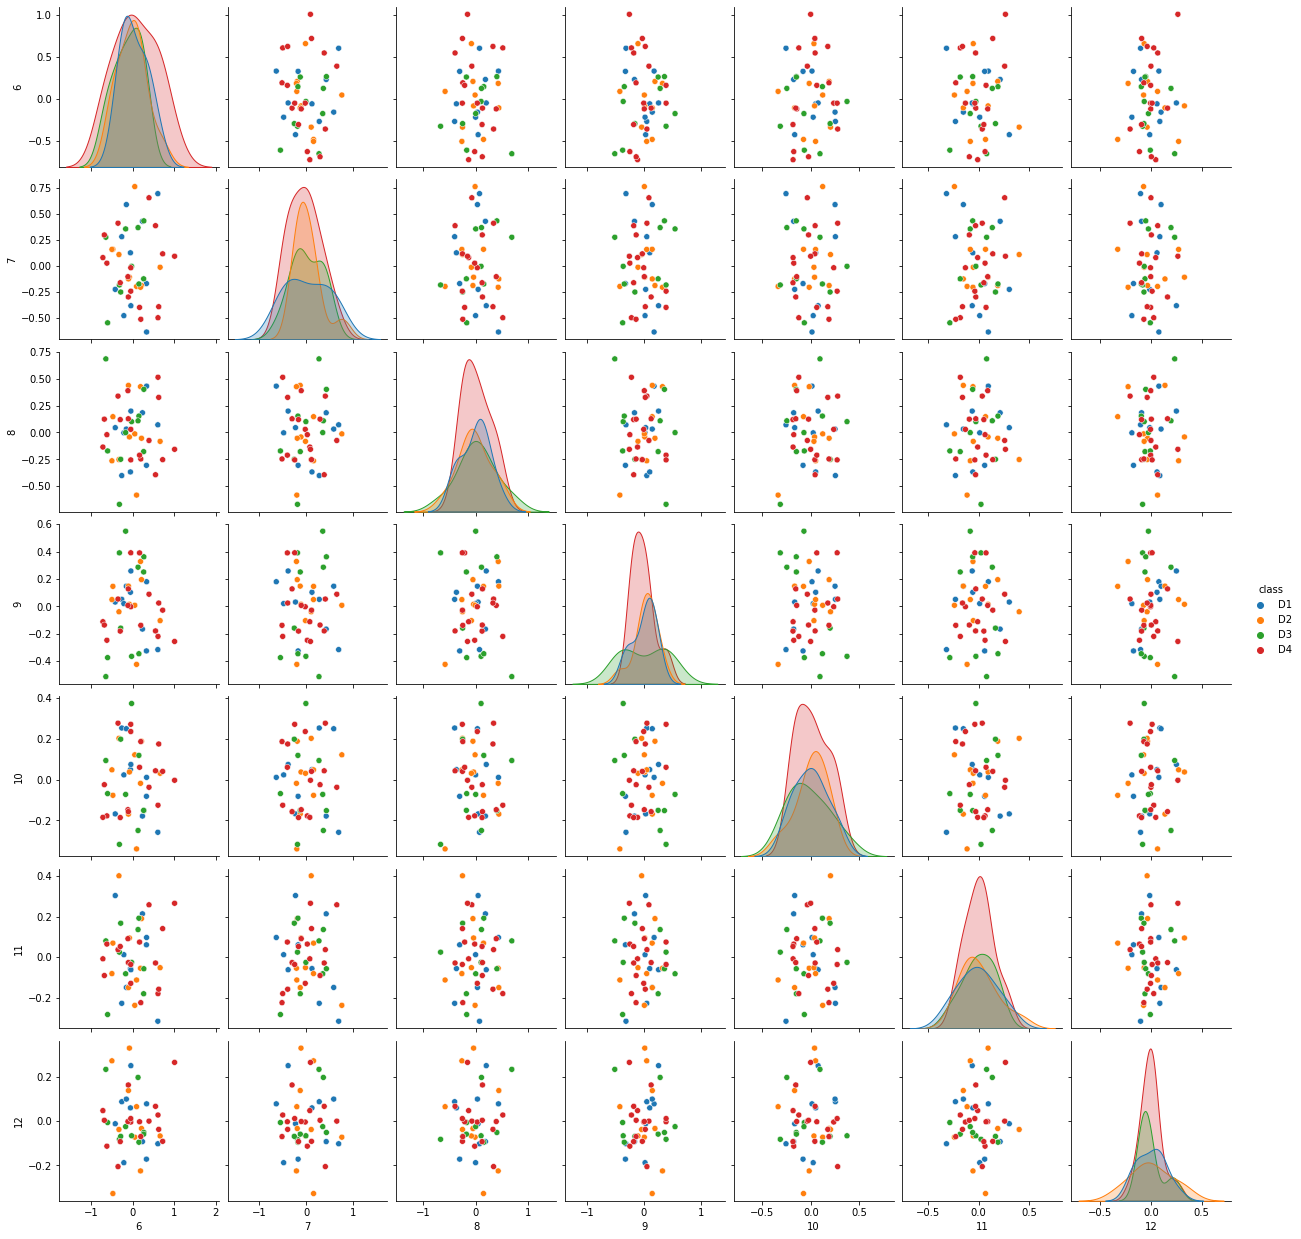

In [ ]:
sns.pairplot(ddf, hue='class')

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.530720,1.296625,0.103923,0.442024,0.366000,0.104305,0.604145,0.691382,0.071053,-0.314788,-0.257680,-0.316710,-0.102330,0.105183,0.008539,-0.130197,-0.008402
1,0.547516,1.609247,-0.448421,0.003218,-0.317462,-0.119955,0.332599,-0.639215,0.430729,0.180234,0.010662,0.096629,0.078149,-0.084782,0.062026,-0.026371,0.047351
2,0.064052,1.425823,-0.784925,-0.047952,-0.384275,0.223411,-0.266005,0.277212,-0.400876,0.051747,0.251843,-0.228275,0.087789,-0.018628,0.055892,0.015299,0.016065
3,0.706106,1.389778,-0.185695,0.423500,0.639889,-0.650775,-0.423360,-0.229232,0.044525,0.032097,-0.167862,0.303664,-0.011814,-0.051362,0.002405,-0.136230,0.018665
4,0.140755,1.448986,-0.305107,0.213463,0.288229,0.936758,-0.056732,0.122307,-0.367094,0.103453,0.048570,-0.056797,0.059904,0.003957,-0.005222,-0.033501,-0.081992
5,0.595858,1.433671,-0.630186,0.149897,-0.109218,-0.797432,-0.215444,-0.481883,-0.003414,0.020893,0.022758,0.011785,-0.187831,0.080981,-0.095641,0.141589,-0.079220
6,0.507096,1.505703,-0.078121,0.329395,0.576890,-0.324639,-0.046190,-0.386538,0.198760,0.258690,0.073703,-0.062463,0.250810,-0.099841,0.062692,-0.198225,0.032352
7,0.040715,1.478464,-0.700510,-0.104012,-0.431682,0.406673,-0.155377,0.586064,0.031584,0.147715,0.248230,-0.149970,0.099698,-0.019087,0.071387,0.017081,-0.001335
8,0.490633,1.400432,-0.768990,-0.301739,-0.074951,-0.074407,0.329160,-0.173382,-0.305663,-0.324477,-0.081857,0.060535,-0.171815,0.092692,-0.069411,0.182030,0.017031
9,0.485879,1.459000,-0.257126,-0.069659,0.681763,0.253271,0.232949,0.425465,0.182963,-0.165058,-0.178454,0.213480,-0.092506,0.083955,-0.038041,0.053716,0.020857


Text(0.5, 0.92, '3D plot of KMeans Clustering')

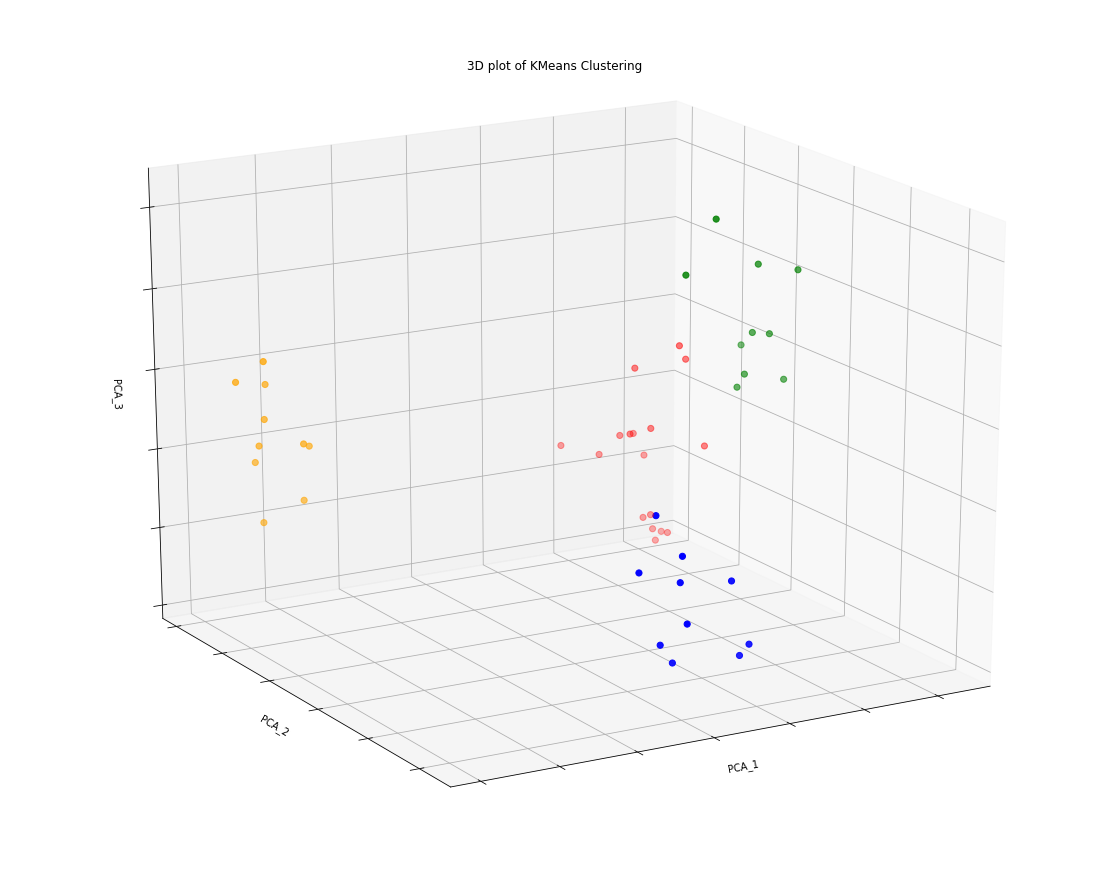

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = classes.apply(lambda r: ['blue', 'orange', 'green', 'red'][int(r[-1])-1])
ax.scatter(df[0], df[1], df[2], c=labels, marker='.', s=150)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.set_title('3D plot of KMeans Clustering')


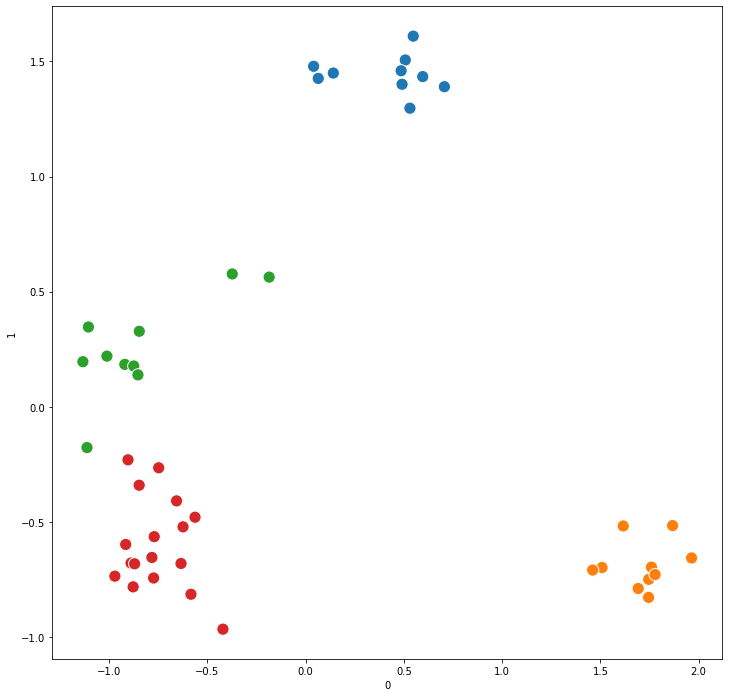

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df[0], y=df[1], hue=labels, legend=False, s=150)
# plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=150, c='black')

## 

In [ ]:
from   model.dqc import DQC
import model.base_dqc as dqc

In [ ]:
df = df.loc[:,:5]
def run_model(SIGMA = 0.01, M = 0.07):
  edqc = DQC(df)
  edqc.calculate_N(SIGMA)
  N = np.array(edqc.N)
  data_fit = np.array(edqc.data_fit)
  H = dqc.calculate_H(data_fit,SIGMA,M)
  H = dqc.basis_transform(H,N)
  X = dqc.calculate_X(data_fit,M)
  X = dqc.basis_transform(X,N,is_expectation=True)

  P,H = dqc.diagonalize_H(H)

  H = np.round(H, 4)

  traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)
  S = dqc.reverse_entropy(traj, N_traj)

  return N, H, X , P, traj, N_traj, S

In [ ]:
N, H, X , P, traj, N_traj, S = run_model(SIGMA = .01, M = .01)

/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  H_diag[i] = evals[i] * H_diag[i]
/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


In [ ]:
P.shape

(47, 47)

In [ ]:
X_t = traj[100,:]

In [ ]:
traj[10].shape

(6, 47, 47)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9777ce9690>]],
      dtype=object)

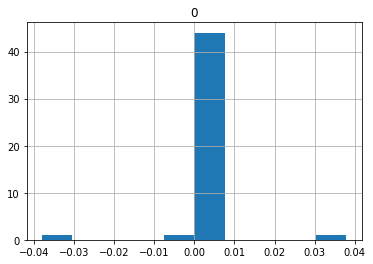

In [ ]:
pd.DataFrame(H.diagonal()).hist()

In [ ]:
np.round(H.diagonal(),4)

array([-0.    , -0.    ,  0.    , -0.    ,  0.    , -0.    , -0.    ,
        0.    ,  0.    , -0.    , -0.    , -0.    ,  0.    , -0.    ,
        0.    ,  0.    , -0.    , -0.    ,  0.    , -0.    , -0.0379,
        0.0379,  0.    ,  0.    ,  0.    ,  0.    , -0.0001,  0.0001,
       -0.    ,  0.    ,  0.    , -0.    , -0.    ,  0.    , -0.    ,
       -0.    ,  0.    , -0.    ,  0.    ,  0.    ,  0.    , -0.    ,
       -0.    , -0.    ,  0.    ,  0.    , -0.    ])

In [ ]:
traj.shape

(200, 6, 47, 47)

Text(0, 0.5, 'Reverse Entropy (1/S)')

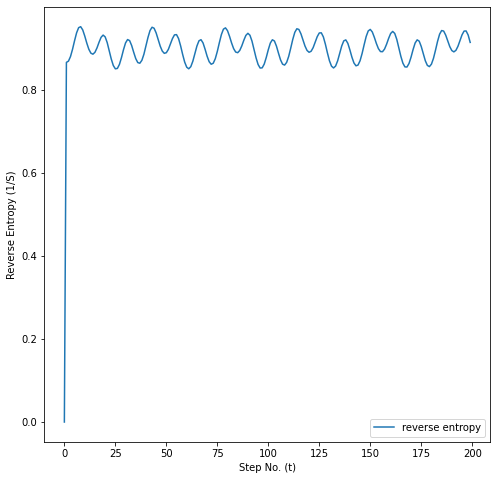

In [ ]:
ax = pd.DataFrame(1/S, columns=['reverse entropy']).plot(figsize=(8,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [ ]:
color_selection = [((0, 9), 'blue'), ((10, 19), 'orange'), ((20, 29), 'green'), ((30,46), 'red')]

In [ ]:
directory = '/content/drive/MyDrive/EDQC/data/uci/{}/'.format(label.lower())

if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

_tmp = dqc.plot_steps(traj, color_selections=color_selection)
del(_tmp)

animator()

/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:336: RuntimeWarning: divide by zero encountered in reciprocal
  norm = np.sqrt(x ** 2 + y ** 2 + z ** 2) ** -1
/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:339: RuntimeWarning: invalid value encountered in multiply
  ax.scatter(x * norm, y * norm, z * norm, c=col)
/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:326: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
np.where(S == S.max())

(array([25]),)

In [ ]:
t_25 = traj[25,:,:,:]

In [ ]:
t_25[0]

array([[-1.4809532e+00+0.e+00j, -0.0000000e+00+0.e+00j,
        -4.4715434e-42+0.e+00j, ...,  0.0000000e+00+0.e+00j,
         0.0000000e+00+0.e+00j,  0.0000000e+00+0.e+00j],
       [ 0.0000000e+00+0.e+00j, -1.1444299e+00+0.e+00j,
         4.7408510e-05+0.e+00j, ...,  0.0000000e+00+0.e+00j,
         0.0000000e+00+0.e+00j,  0.0000000e+00+0.e+00j],
       [-0.0000000e+00+0.e+00j, -1.5189902e-04+0.e+00j,
        -1.0681225e+00+0.e+00j, ...,  0.0000000e+00+0.e+00j,
         0.0000000e+00+0.e+00j,  0.0000000e+00+0.e+00j],
       ...,
       [ 0.0000000e+00+0.e+00j,  0.0000000e+00+0.e+00j,
         0.0000000e+00+0.e+00j, ..., -1.1437992e+00-1.e-45j,
         3.8362173e-23+0.e+00j, -3.7466092e-20-0.e+00j],
       [ 0.0000000e+00+0.e+00j,  0.0000000e+00+0.e+00j,
         0.0000000e+00+0.e+00j, ...,  1.1684903e-22+0.e+00j,
        -6.9768602e-01-0.e+00j, -2.1035810e-07-0.e+00j],
       [ 0.0000000e+00+0.e+00j,  0.0000000e+00+0.e+00j,
         0.0000000e+00+0.e+00j, ..., -1.3351801e-29+0.e+00j,
 